In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rc('font', family='NanumBarunGothic')

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# CSV 파일이 저장된 폴더 경로
folder_path = '/content/drive/MyDrive/DB프로젝트/data_csv/result_EnergyTrading'

columns_to_read = ['전국', '경기도', '강원도', '경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도', '제주도', '서울', '인천', '대전', '광주', '대구', '세종', '울산', '부산']

# 해당 폴더 내의 모든 CSV 파일 목록
file_list = sorted([f for f in os.listdir(folder_path) if f.startswith('result_EnergyTrading') and f.endswith('.csv')])

# 첫 번째 행의 데이터를 저장할 빈 데이터프레임 생성
first_row_data = pd.DataFrame()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# # 각 파일의 첫 번째 행의 데이터를 읽어와서 빈 데이터프레임에 추가
# for file in file_list:
#     file_path = os.path.join(folder_path, file)
#     file_data = pd.read_csv(file_path)
#     file_data.set_index(file_data.columns[0], inplace=True)
#     file_data = file_data.T
#     file_data.to_csv(file_path)

In [4]:
# 각 파일의 첫 번째 행의 데이터를 읽어와서 빈 데이터프레임에 추가
for file in file_list:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, nrows=1)  # 첫 번째 행만 읽기
    first_row_data = pd.concat([first_row_data, data])

# 인덱스를 '2012'부터 '2022'까지 변경
first_row_data.index = [str(year) for year in range(2012, 2023)]

# 데이터프레임 출력
print(first_row_data)

       Unnamed: 0        전국      경기도      강원도     경상남도     경상북도     전라남도  \
2012  전력거래량 (GWh)  471795.0  23567.0  10996.0  59496.0  66408.0  60562.0   
2013  전력거래량 (GWh)  479541.0  28692.0  11631.0  59730.0  65007.0  58081.0   
2014  전력거래량 (GWh)  490399.0  33053.0   9463.0  56368.0  73023.0  63338.0   
2015  전력거래량 (GWh)  495361.0  47342.0   7581.0  55843.0  84168.0  61013.0   
2016  전력거래량 (GWh)  509234.0  53907.0   9891.0  55226.0  77891.0  63504.0   
2017  전력거래량 (GWh)  520917.0  58961.0  19803.0  52652.0  79858.0  60694.0   
2018  전력거래량 (GWh)  537061.0  71010.0  29474.0  50336.0  72015.0  54295.0   
2019  전력거래량 (GWh)  529851.0  72987.0  26995.0  45523.0  75178.0  50263.0   
2020  전력거래량 (GWh)  515983.0  70924.0  25593.0  32758.0  80585.0  51713.0   
2021  전력거래량 (GWh)  537061.0  80234.0  27891.0  41105.0  75478.0  54381.0   
2022  전력거래량 (GWh)  551380.0  83983.0  30959.0  46420.0  82646.0  51583.0   

         전라북도      충청남도    충청북도     제주도      서울       인천     대전     광주  \
2012   7720.0

In [5]:
first_row_data.drop(first_row_data.columns[0], axis=1, inplace=True)

In [6]:
first_row_data = first_row_data.astype(int)
first_row_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2012 to 2022
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   전국      11 non-null     int64
 1   경기도     11 non-null     int64
 2   강원도     11 non-null     int64
 3   경상남도    11 non-null     int64
 4   경상북도    11 non-null     int64
 5   전라남도    11 non-null     int64
 6   전라북도    11 non-null     int64
 7   충청남도    11 non-null     int64
 8   충청북도    11 non-null     int64
 9   제주도     11 non-null     int64
 10  서울      11 non-null     int64
 11  인천      11 non-null     int64
 12  대전      11 non-null     int64
 13  광주      11 non-null     int64
 14  대구      11 non-null     int64
 15  세종      11 non-null     int64
 16  울산      11 non-null     int64
 17  부산      11 non-null     int64
dtypes: int64(18)
memory usage: 1.6+ KB


In [7]:
first_row_data.columns

Index(['전국', '경기도', '강원도', '경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도',
       '제주도', '서울', '인천', '대전', '광주', '대구', '세종', '울산', '부산'],
      dtype='object')

In [8]:
first_row_data.to_csv('/content/drive/MyDrive/DB프로젝트/data_csv/result_Data/result_EnergyTrading.csv')

# **지역별 에너지 거래량**

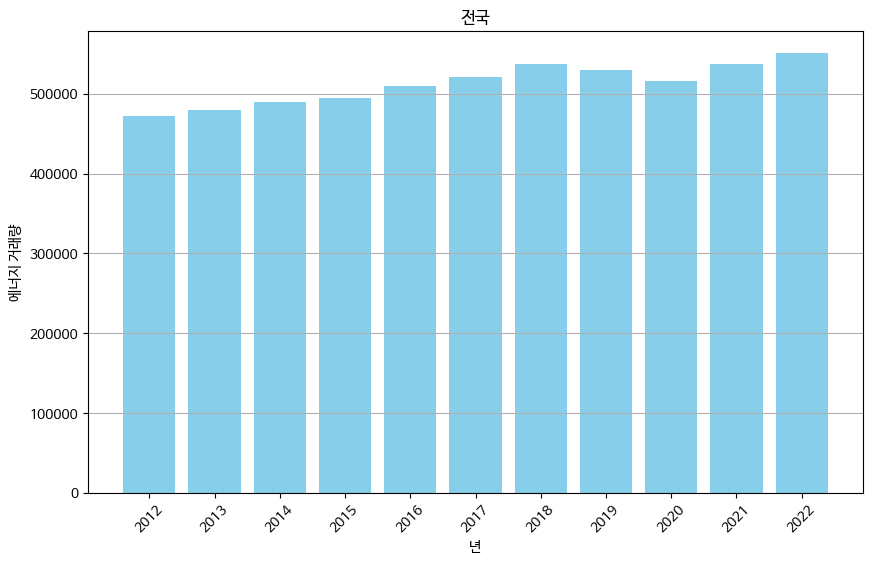

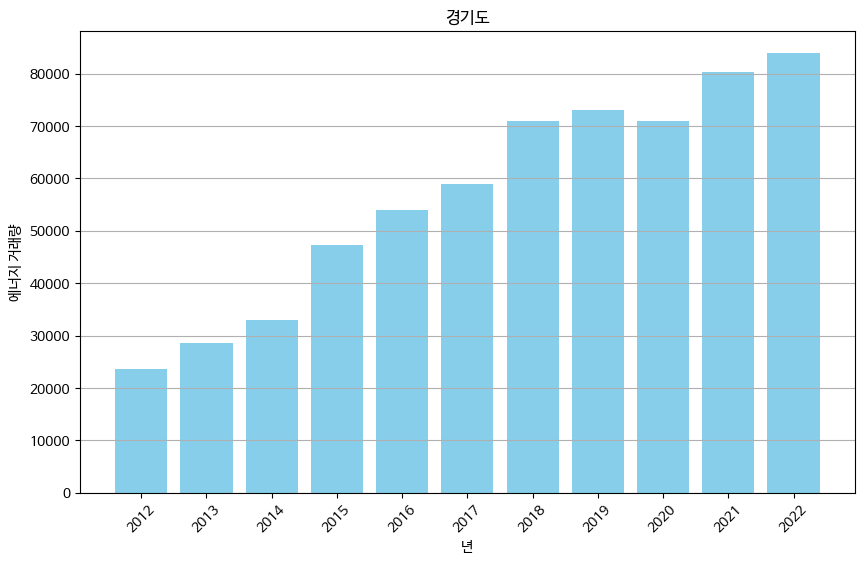

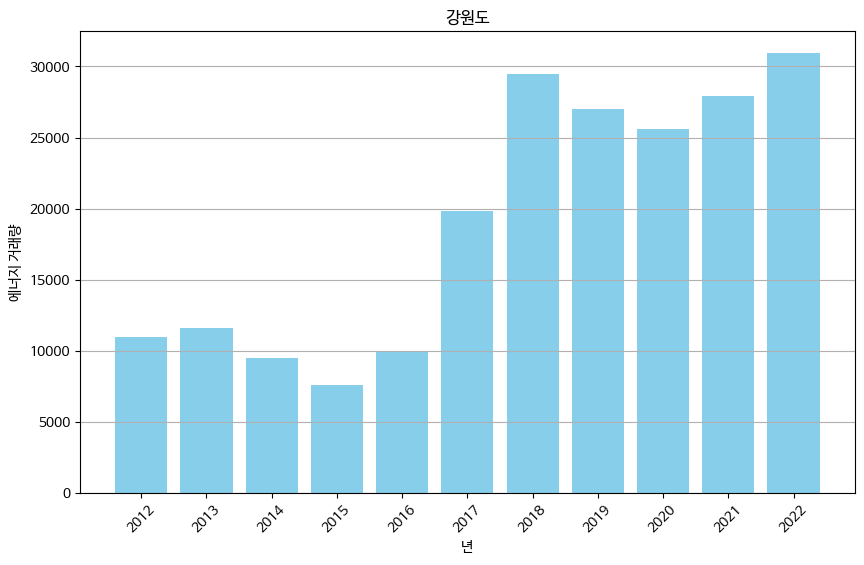

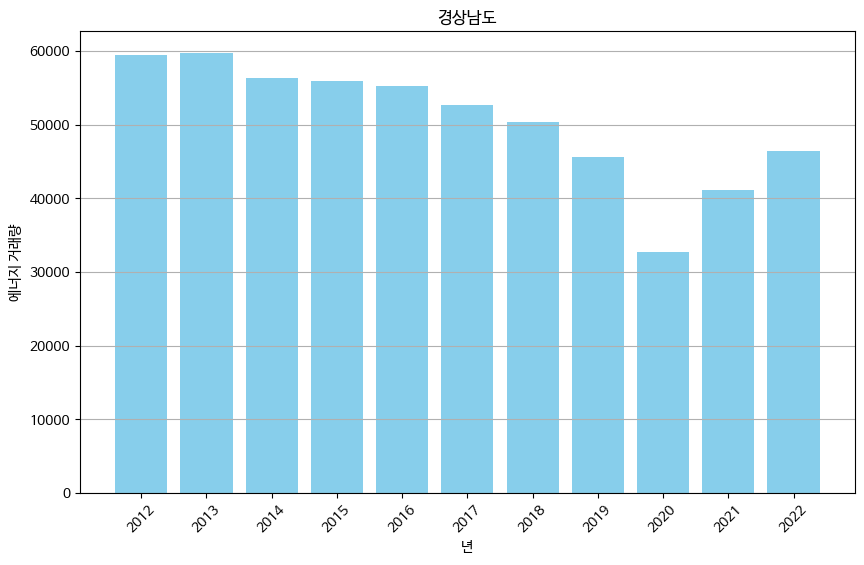

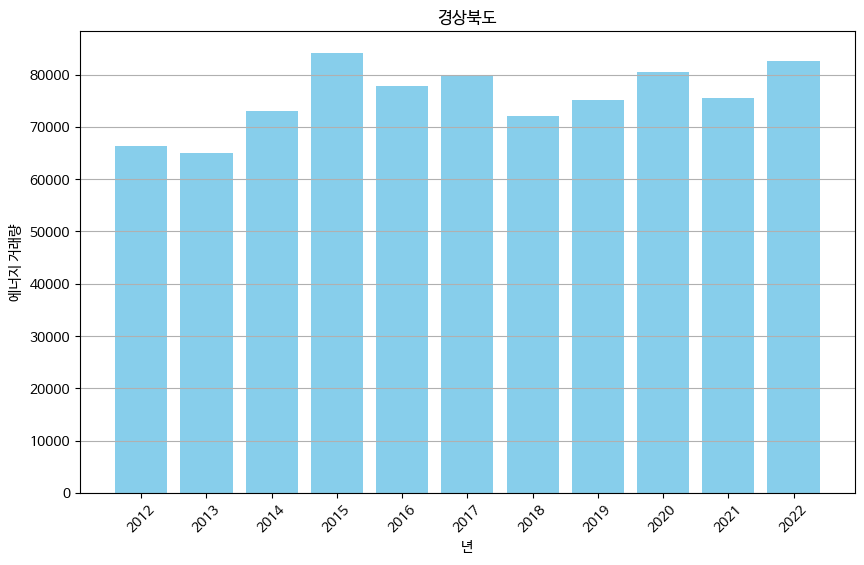

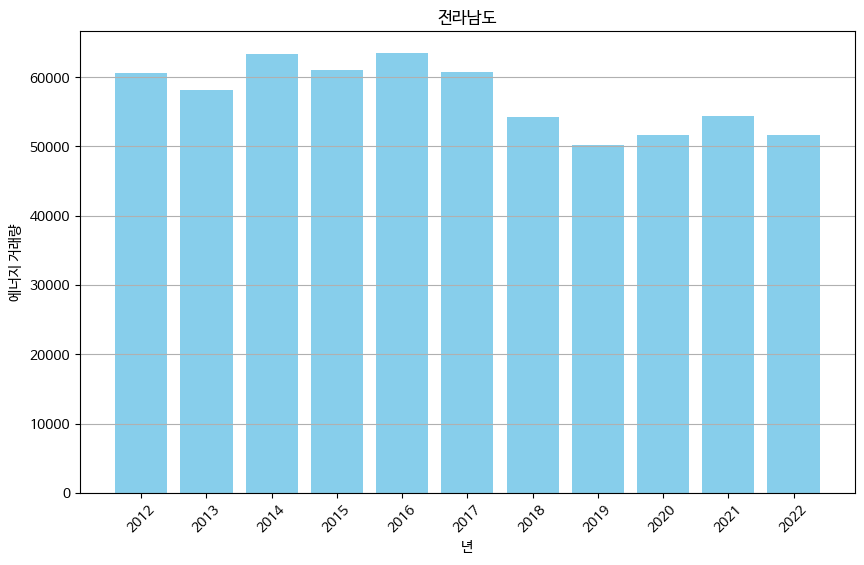

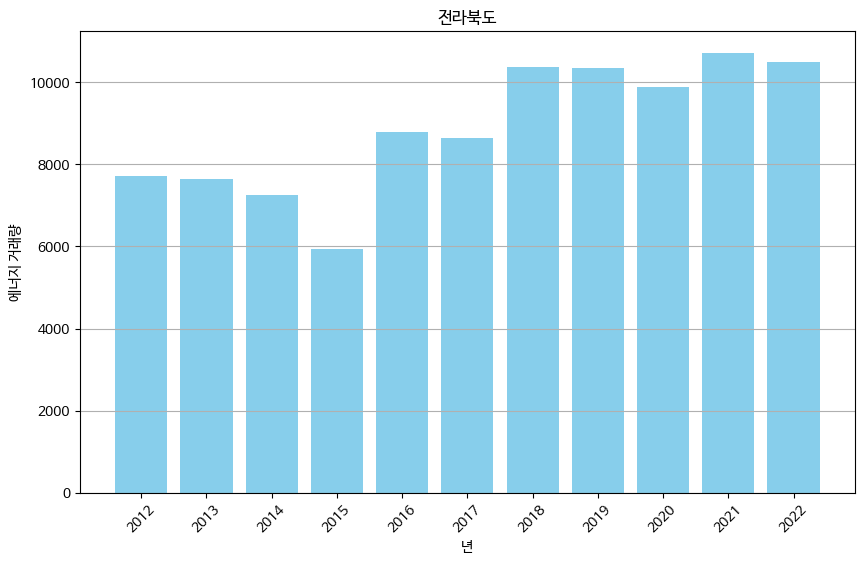

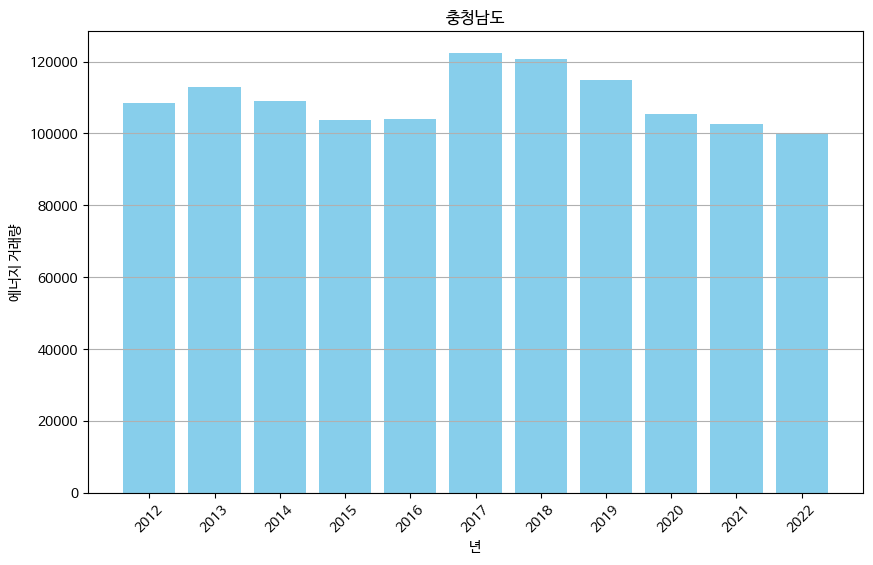

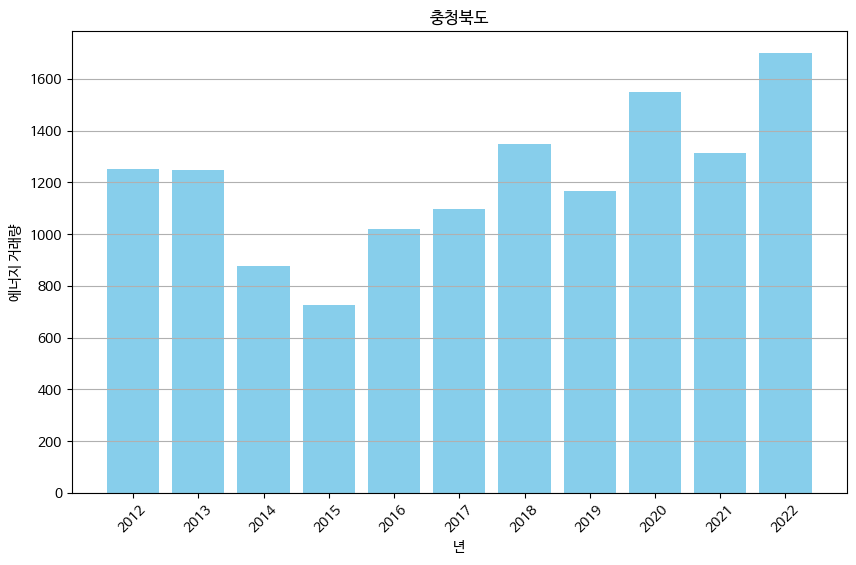

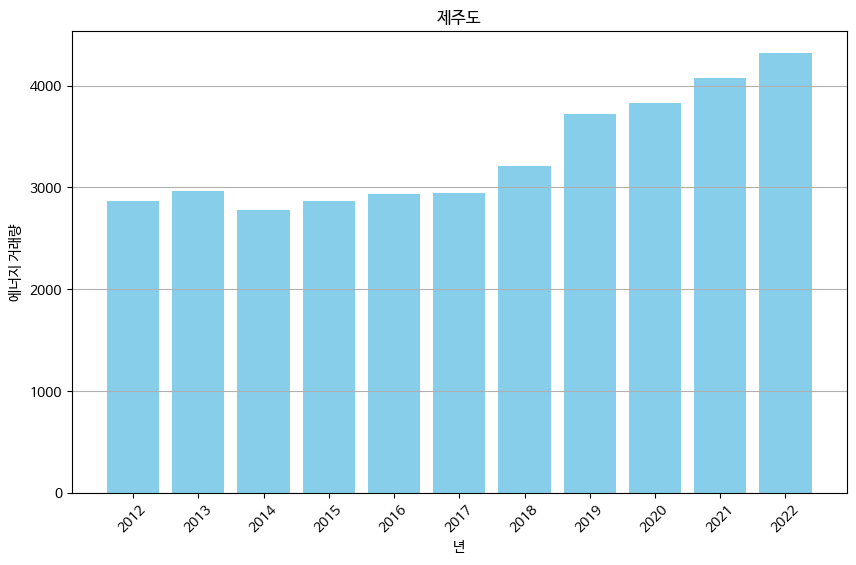

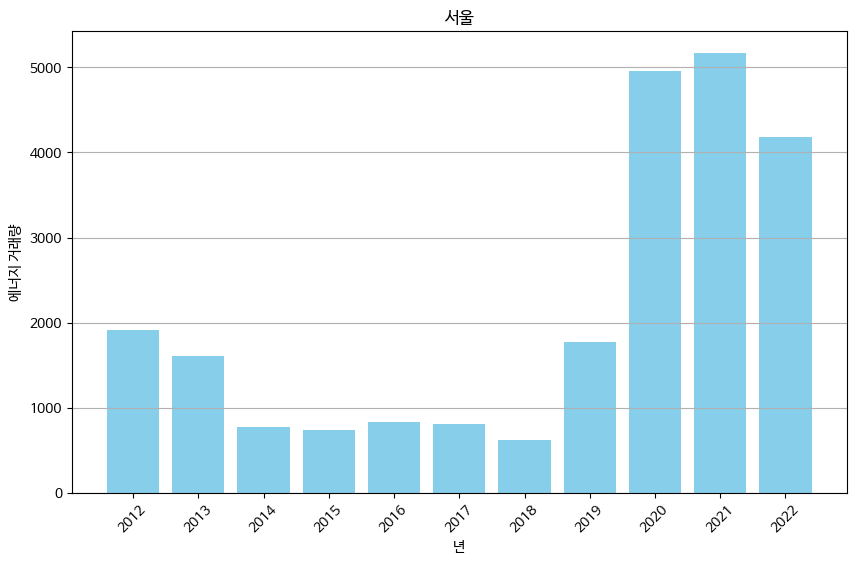

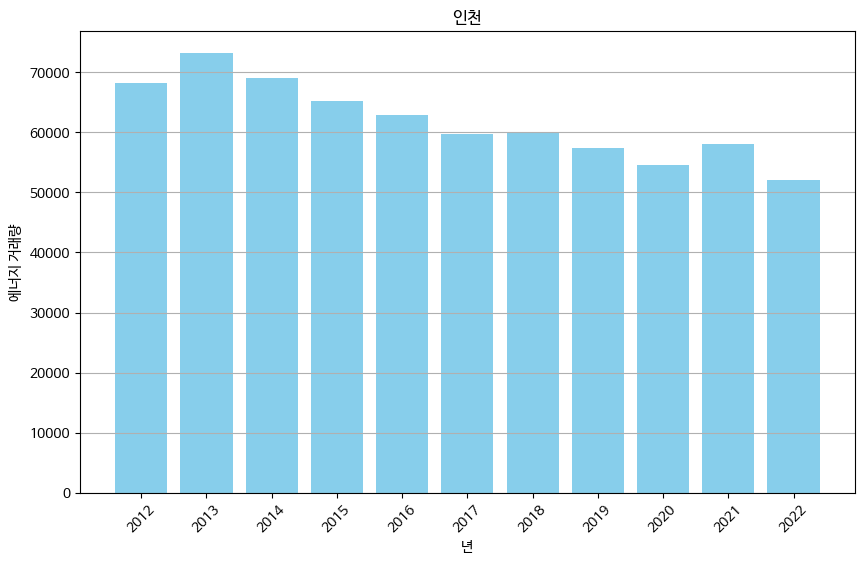

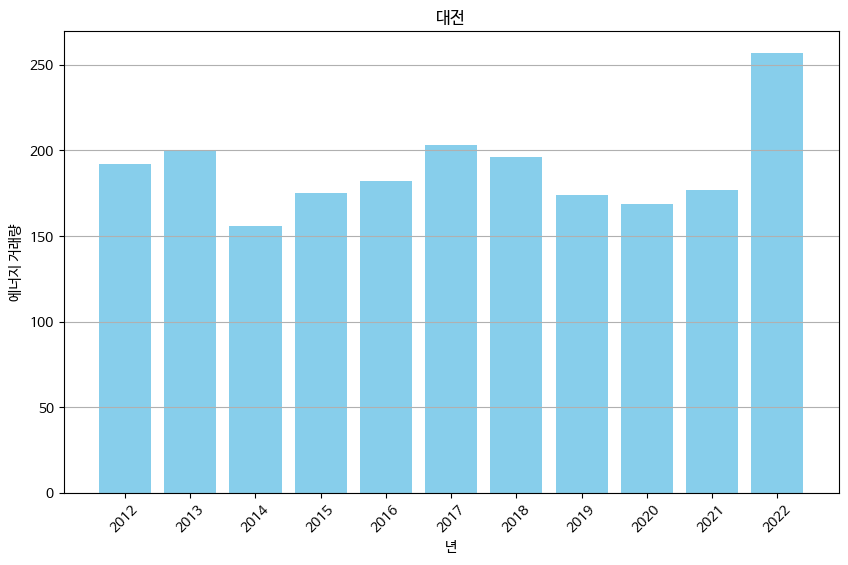

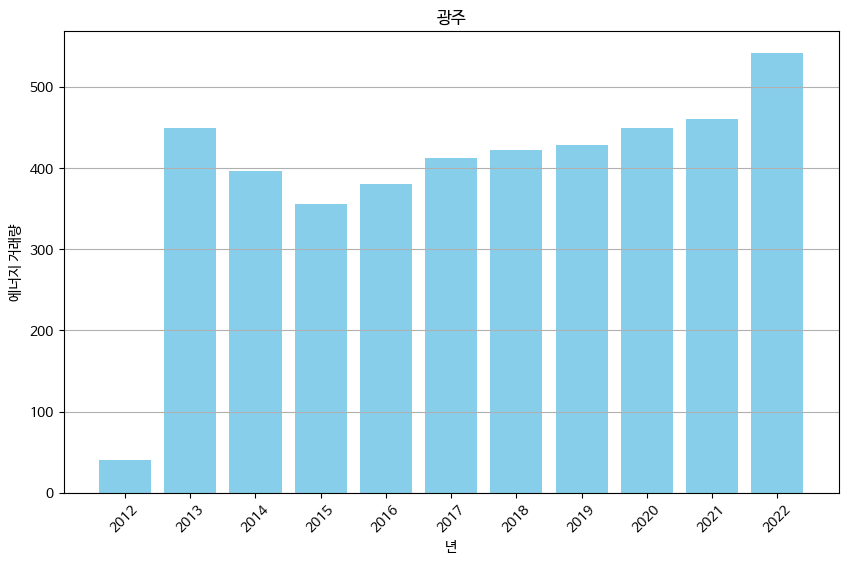

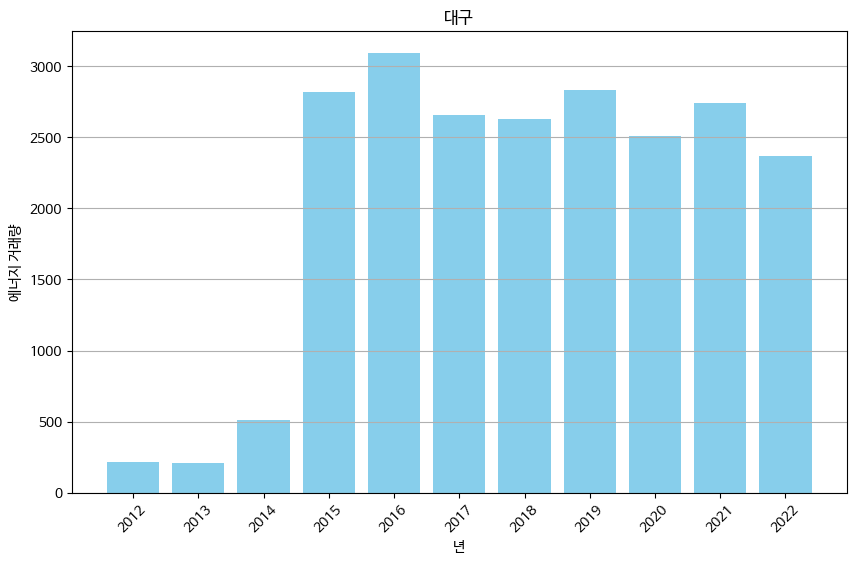

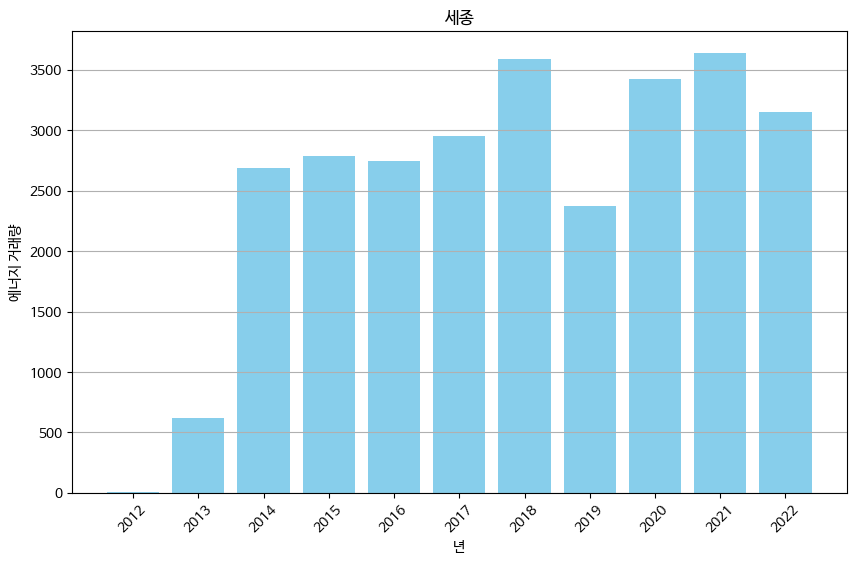

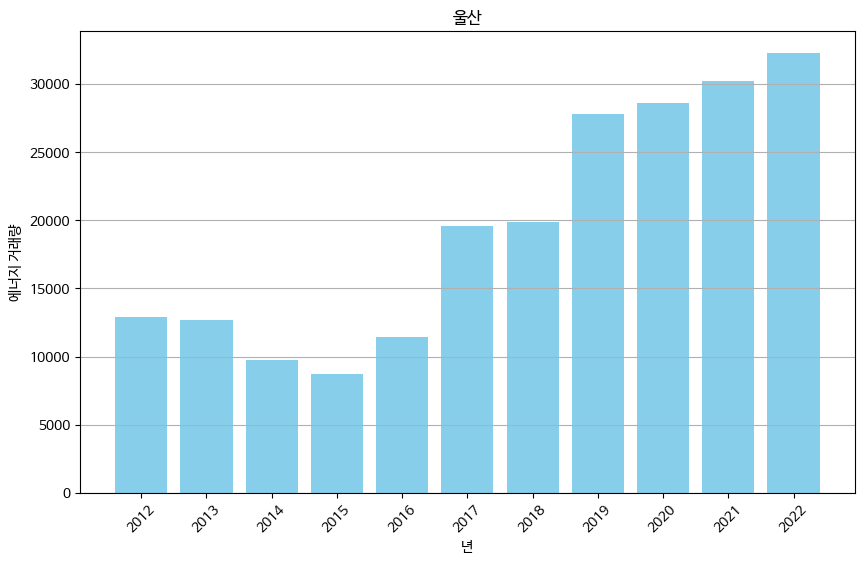

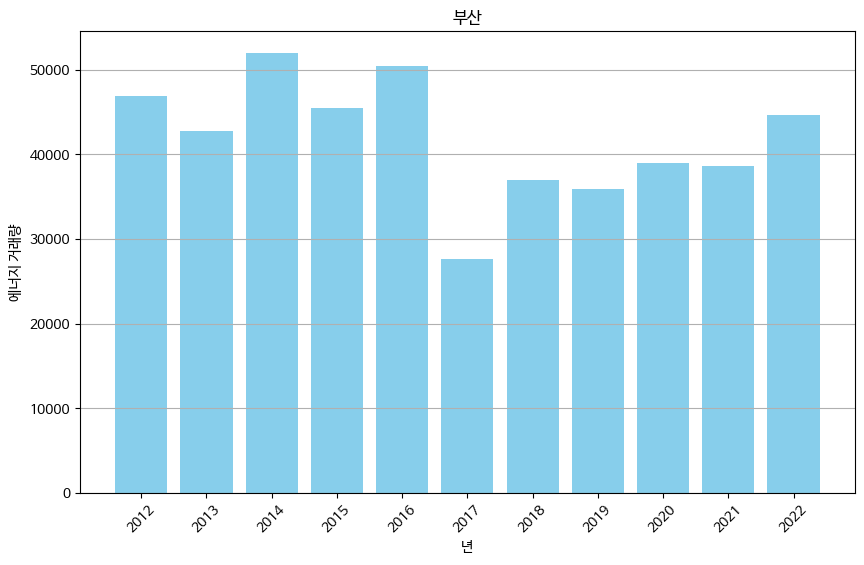

In [9]:
for column in first_row_data.columns:
    plt.figure(figsize=(10, 6))
    plt.bar(first_row_data.index, first_row_data[column], color='skyblue')
    plt.title(column)
    plt.xlabel('년')
    plt.ylabel('에너지 거래량')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

#**꺾은선 그래프**

전부

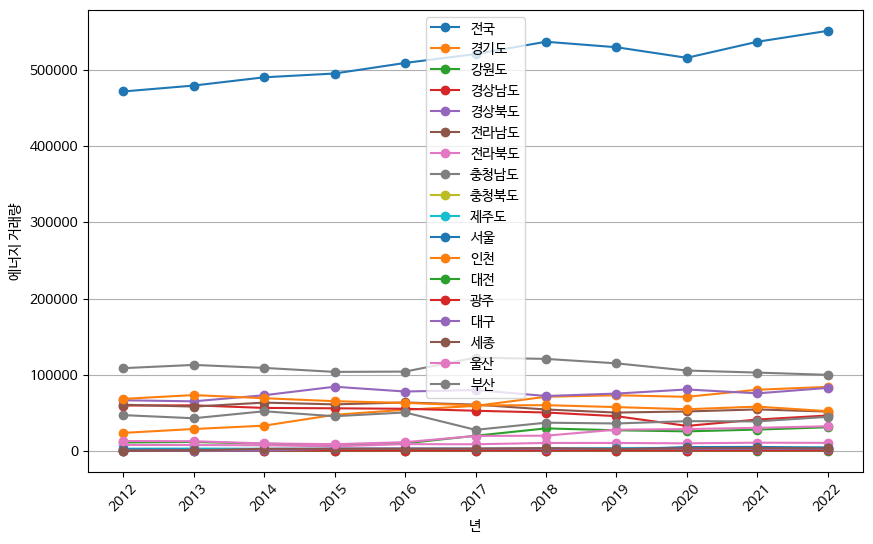

In [10]:
# 열을 제외한 열만 선택하여 새로운 데이터프레임 생성
data_without_total = first_row_data.drop(columns=[])

# 그래프를 담을 figure 생성
plt.figure(figsize=(10, 6))

# 각 열의 데이터에 대해 꺾은선 그래프로 추가
for column in data_without_total.columns:
    plt.plot(data_without_total.index, data_without_total[column], marker='o', label=column)

# 그래프에 제목, 레이블, 범례 등 추가
plt.xlabel('년')
plt.ylabel('에너지 거래량')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# 그래프 출력
plt.show()

total 제외

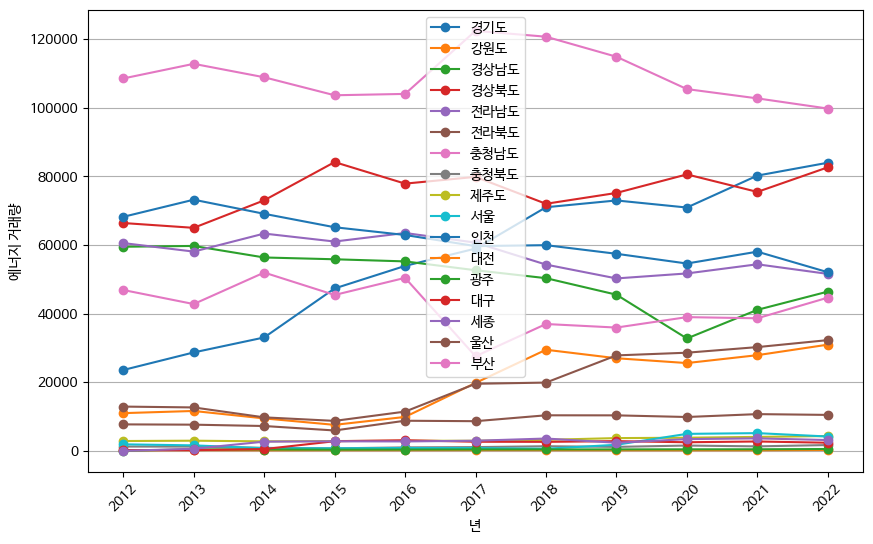

In [11]:
# 'total' 열을 제외한 열만 선택하여 새로운 데이터프레임 생성
data_without_total = first_row_data.drop(columns=['전국'])

# 그래프를 담을 figure 생성
plt.figure(figsize=(10, 6))

# 각 열의 데이터에 대해 꺾은선 그래프로 추가
for column in data_without_total.columns:
    plt.plot(data_without_total.index, data_without_total[column], marker='o', label=column)

# 그래프에 제목, 레이블, 범례 등 추가
plt.xlabel('년')
plt.ylabel('에너지 거래량')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# 그래프 출력
plt.show()